# **Clone git to get output.csv (cleaned dataset) or upload Dataset (ChatGPT.csv) and run below cell to generate output.csv**

In [1]:
!git clone https://github.com/r1shabhpahwa/SNA_Project.git

Cloning into 'SNA_Project'...
remote: Enumerating objects: 29, done.
remote: Counting objects: 100% (29/29), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 29 (delta 8), reused 29 (delta 8), pack-reused 0
Unpacking objects: 100% (29/29), 21.83 MiB | 2.28 MiB/s, done.


# **Note: Skip this part if cloned from GIT as we already have cleanedDataset.csv**

This code reads data from a CSV file named 'dataset.csv', extracts specific columns (namely 'Date', 'Tweet', 'Url', 'User', and 'Location'), and writes the extracted data to another CSV file named 'cleanedDataset.csv'.

Also we are removing URLs and special characters except for @mentions to later identify edges for social network analysis


In [ ]:
import csv
import re

# Input and output file paths
input_file = 'dataset.csv'
output_file = 'SNA_Project/cleanedDataset.csv'

# Read the input file and extract the required columns
rows = []
with open(input_file, 'r', encoding='utf-8') as f:
    csvreader = csv.DictReader(f)
    for row in csvreader:
        try:
            date = row['Date']
            url = row['Url']
            user = row['User']
            city, country = row['Location'].split(',')
            tweet = row['Tweet']
            # Remove URLs from the tweet text
            tweet = re.sub(r'http\S+', '', tweet)
            tweet = re.sub(r'www\S+', '', tweet)
            # Remove special characters from the tweet text
            tweet = re.sub('[^a-zA-Z0-9\s@]+', '', tweet)
            rows.append({
                'Date': date,
                'Tweet': tweet.strip(),
                'City': city.strip(),
                'Country': country.strip(),
                'Url': url,
                'User': user
            })
        except (ValueError, KeyError):
            pass

# Write the extracted data to the output file
with open(output_file, 'w', newline='', encoding='utf-8') as f:
    fieldnames = ['Date', 'Tweet', 'City', 'Country', 'Url', 'User']
    csvwriter = csv.DictWriter(f, fieldnames=fieldnames)
    csvwriter.writeheader()
    for row in rows:
        csvwriter.writerow(row)

We then read the CSV file called "output.csv" and split the data into separate CSV files based on the continent of the country in each row. If the country is not found in the continent list, the row is written to a "missing.csv" file. The script uses the csv module to read and write the CSV files.

In [26]:
import csv

continents = {
    'Asia': ['Afghanistan', 'Armenia', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Bhutan', 'Brunei', 'Cambodia', 'China', 'Cyprus', 'Georgia', 'India', 'Indonesia', 'Iran', 'Iraq', 'Israel', 'Japan', 'Jordan', 'Kazakhstan', 'Kuwait', 'Kyrgyzstan', 'Laos', 'Lebanon', 'Malaysia', 'Maldives', 'Mongolia', 'Myanmar (Burma)', 'Nepal', 'North Korea', 'Oman', 'Pakistan', 'Palestine', 'Philippines', 'Qatar', 'Russia', 'Saudi Arabia', 'Singapore', 'South Korea', 'Sri Lanka', 'Syria', 'Taiwan', 'Tajikistan', 'Thailand', 'Timor-Leste (East Timor)', 'Turkey', 'Turkmenistan', 'United Arab Emirates (UAE)', 'Uzbekistan', 'Vietnam', 'Yemen'],
    'Africa': ['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cameroon', 'Central African Republic (CAR)', 'Chad', 'Comoros', 'Democratic Republic of the Congo', 'Republic of the Congo', 'Cote d\'Ivoire', 'Djibouti', 'Egypt', 'Equatorial Guinea', 'Eritrea', 'Eswatini (formerly Swaziland)', 'Ethiopia', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Kenya', 'Lesotho', 'Liberia', 'Libya', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mauritius', 'Morocco', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Rwanda', 'Sao Tome and Principe', 'Senegal', 'Seychelles', 'Sierra Leone', 'Somalia', 'South Africa', 'South Sudan', 'Sudan', 'Tanzania', 'Togo', 'Tunisia', 'Uganda', 'Zambia', 'Zimbabwe'],
    'Europe': ['Albania', 'Andorra', 'Austria', 'Belarus', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Kazakhstan', 'Kosovo', 'Latvia', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malta', 'Moldova', 'Monaco', 'Montenegro', 'Netherlands', 'North Macedonia (formerly Macedonia)', 'Norway', 'Poland', 'Portugal', 'Romania', 'Russia', 'San Marino', 'Serbia', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Ukraine', 'United Kingdom (UK)', 'Vatican City (Holy See)'],
    'North America': ['US','United States of America', 'USA','Antigua and Barbuda', 'Bahamas', 'Barbados', 'Belize', 'Canada', 'Costa Rica', 'Cuba','Mexico'],
    'South America':['Argentina','Bolivia','Brazil','Chile','Colombia','Ecuador','Guyana','Paraguay','Peru','Suriname','Uruguay','Venezuela'],
    'Oceania':['Fiji','Kiribati','Marshall Islands', 'Micronesia','Nauru','New Zealand','Palau','Papua New Guinea','Samoa','Solomon Islands','Tonga','Tuvalu','Vanuatu','Australia']
    }

continents_files = {continent: open(f'{continent}.csv', 'w', newline='', encoding='utf-8') for continent in continents}
missing_file = open('missing.csv', 'w', newline='', encoding='utf-8')

csvwriter_dict = {}
for continent, file in continents_files.items():
    csvwriter_dict[continent] = csv.DictWriter(file, fieldnames=['Date', 'Tweet', 'City', 'Country', 'Url', 'User'])
    csvwriter_dict[continent].writeheader()

csvwriter_missing = csv.DictWriter(missing_file, fieldnames=['Date', 'Tweet', 'City', 'Country','Url', 'User'])
csvwriter_missing.writeheader()

with open('SNA_Project/cleanedDataset.csv', 'r', encoding='utf-8') as csvfile:
    csvreader = csv.DictReader(csvfile)
    for row in csvreader:
        try:
            date, city, country, user, url = row['Date'], row['City'], row['Country'], row['User'], row['Url']
            continent = None
            for cont, countries in continents.items():
                if country in countries:
                    continent = cont
                    break
            if continent is None:
                raise ValueError(f'No continent found for country {country}')
            csvwriter_dict[continent].writerow({'Date': date, 'Tweet': row['Tweet'], 'City': city, 'Country': country, 'Url': url, 'User': user})
        except (KeyError, ValueError):
            csvwriter_missing.writerow({'Date': row.get('Date', 'N/A'), 'Tweet': row['Tweet'], 'City': row.get('City', 'N/A'), 'Country': row.get('Country', 'N/A'), 'Url': row.get('Url', 'N/A'), 'User': row.get('User', 'N/A')})

for file in continents_files.values():
    file.close()

missing_file.close()

This code defines a function called calculate_monthly_sentiment that reads a CSV file containing tweets, extracts the month from the 'Date' column, removes URLs, mentions, and hashtags from the tweets, calculates the sentiment score for each tweet using TextBlob, and then calculates the average sentiment score for each month. The function returns a Pandas Series object containing the monthly sentiment scores.

The function is executed for all the continents ie. Africa, Asia, Europe, North America, Oceania, and South America and the results are printed. 


In [22]:
import pandas as pd
from textblob import TextBlob

def calculate_monthly_sentiment(filename):
    # Load CSV file
    df = pd.read_csv(filename)

    # Convert 'Date' column to a datetime object and extract month
    df['month'] = pd.to_datetime(df['Date']).dt.strftime('%Y-%m')

    # Clean up tweets by removing URLs, mentions, and hashtags
    df['clean_tweet'] = df['Tweet'].str.replace('http\S+|www.\S+|@\S+|#\S+', '', case=False)

    # Calculate sentiment score for each tweet
    df['sentiment'] = df['clean_tweet'].apply(lambda tweet: TextBlob(tweet).sentiment.polarity)

    # Calculate overall sentiment score for each month
    monthly_sentiment = df.groupby('month')['sentiment'].mean()

    return monthly_sentiment

# Calculate monthly sentiment scores for Europe.csv and Asia.csv
africa_sentiment = calculate_monthly_sentiment('Africa.csv')
asia_sentiment = calculate_monthly_sentiment('Asia.csv')
europe_sentiment = calculate_monthly_sentiment('Europe.csv')
northAmerica_sentiment = calculate_monthly_sentiment('North America.csv')
oceania_sentiment = calculate_monthly_sentiment('Oceania.csv')
southAmerica_sentiment = calculate_monthly_sentiment('South America.csv')

# Print the results
print("\nAfrica monthly sentiment:")
print(africa_sentiment)

print("\nAsia monthly sentiment:")
print(asia_sentiment)

print("\nEurope monthly sentiment:")
print(europe_sentiment)

print("\nNorth America monthly sentiment:")
print(northAmerica_sentiment)

print("\nOceania monthly sentiment:")
print(oceania_sentiment)

print("\nSouth America monthly sentiment:")
print(southAmerica_sentiment)



<ipython-input-22-9e3d818fe363>:12: FutureWarning:

The default value of regex will change from True to False in a future version.

<ipython-input-22-9e3d818fe363>:12: FutureWarning:

The default value of regex will change from True to False in a future version.

<ipython-input-22-9e3d818fe363>:12: FutureWarning:

The default value of regex will change from True to False in a future version.

<ipython-input-22-9e3d818fe363>:12: FutureWarning:

The default value of regex will change from True to False in a future version.

<ipython-input-22-9e3d818fe363>:12: FutureWarning:

The default value of regex will change from True to False in a future version.




Africa monthly sentiment:
month
2022-11    0.356250
2022-12    0.113761
2023-01    0.133952
2023-02    0.127806
Name: sentiment, dtype: float64

Asia monthly sentiment:
month
2022-11    0.000000
2022-12    0.126658
2023-01    0.118560
2023-02    0.123685
Name: sentiment, dtype: float64

Europe monthly sentiment:
month
2022-11   -0.032622
2022-12    0.131928
2023-01    0.114931
2023-02    0.115060
Name: sentiment, dtype: float64

North America monthly sentiment:
month
2022-11    0.200313
2022-12    0.138450
2023-01    0.121387
2023-02    0.121099
Name: sentiment, dtype: float64

Oceania monthly sentiment:
month
2022-12    0.109310
2023-01    0.130113
2023-02    0.114135
Name: sentiment, dtype: float64

South America monthly sentiment:
month
2022-11    0.190909
2022-12    0.172102
2023-01    0.137367
2023-02    0.099293
Name: sentiment, dtype: float64


<ipython-input-22-9e3d818fe363>:12: FutureWarning:

The default value of regex will change from True to False in a future version.



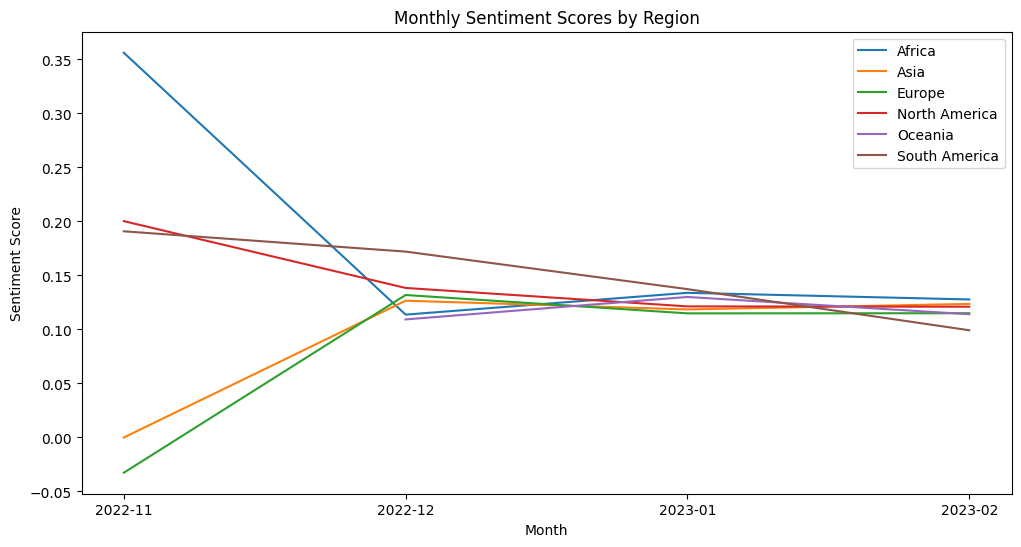

In [23]:
import matplotlib.pyplot as plt

# Concatenate all sentiment scores into a single dataframe
sentiment_df = pd.concat([africa_sentiment, asia_sentiment, europe_sentiment, northAmerica_sentiment, oceania_sentiment, southAmerica_sentiment], axis=1)
sentiment_df.columns = ['Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America']

# Plot the sentiment scores for each region
plt.figure(figsize=(12,6))
plt.plot(sentiment_df.index, sentiment_df['Africa'], label='Africa')
plt.plot(sentiment_df.index, sentiment_df['Asia'], label='Asia')
plt.plot(sentiment_df.index, sentiment_df['Europe'], label='Europe')
plt.plot(sentiment_df.index, sentiment_df['North America'], label='North America')
plt.plot(sentiment_df.index, sentiment_df['Oceania'], label='Oceania')
plt.plot(sentiment_df.index, sentiment_df['South America'], label='South America')
plt.xlabel('Month')
plt.ylabel('Sentiment Score')
plt.title('Monthly Sentiment Scores by Region')
plt.legend()
plt.show()


Install country_converter

In [5]:
pip install country_converter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 KB 1.8 MB/s eta 0:00:00


# **Sentiment scores visualized on the World map**

In [6]:
import pandas as pd
from textblob import TextBlob
import country_converter as coco
import plotly.express as px

def calculate_monthly_sentiment(filename):
    # Load CSV file
    df = pd.read_csv(filename)

    # Convert 'Date' column to a datetime object and extract month
    df['month'] = pd.to_datetime(df['Date']).dt.strftime('%Y-%m')

    # Clean up tweets by removing URLs, mentions, and hashtags
    df['clean_tweet'] = df['Tweet'].str.replace('http\S+|www.\S+|@\S+|#\S+', '', case=False)

    # Calculate sentiment score for each tweet
    df['sentiment'] = df['clean_tweet'].apply(lambda tweet: TextBlob(tweet).sentiment.polarity)

    # Convert country names to continent names
    df['continent'] = coco.convert(names=df['Country'], to='Continent')

    # Add column with 3-letter ISO codes
    df['iso_alpha'] = coco.convert(names=df['Country'], to='ISO3')

    # Calculate overall sentiment score for each month and continent
    monthly_sentiment = df.groupby(['continent', 'month', 'iso_alpha'])['sentiment'].mean().reset_index()

    return monthly_sentiment

# Calculate monthly sentiment scores for each continent
africa_sentiment = calculate_monthly_sentiment('Africa.csv')
asia_sentiment = calculate_monthly_sentiment('Asia.csv')
europe_sentiment = calculate_monthly_sentiment('Europe.csv')
northAmerica_sentiment = calculate_monthly_sentiment('North America.csv')
oceania_sentiment = calculate_monthly_sentiment('Oceania.csv')
southAmerica_sentiment = calculate_monthly_sentiment('South America.csv')

# Combine sentiment scores for all continents into one dataframe
all_sentiment = pd.concat([africa_sentiment, asia_sentiment, europe_sentiment, 
                           northAmerica_sentiment, oceania_sentiment, southAmerica_sentiment])

# Plot sentiment scores on a world map
fig = px.choropleth(all_sentiment, locations='iso_alpha', locationmode='ISO-3',
                    color='sentiment', animation_frame='month', projection='natural earth')
fig.show()


<ipython-input-6-014530a1a8ef>:14: FutureWarning: The default value of regex will change from True to False in a future version.
  df['clean_tweet'] = df['Tweet'].str.replace('http\S+|www.\S+|@\S+|#\S+', '', case=False)
<ipython-input-6-014530a1a8ef>:14: FutureWarning: The default value of regex will change from True to False in a future version.
  df['clean_tweet'] = df['Tweet'].str.replace('http\S+|www.\S+|@\S+|#\S+', '', case=False)
<ipython-input-6-014530a1a8ef>:14: FutureWarning: The default value of regex will change from True to False in a future version.
  df['clean_tweet'] = df['Tweet'].str.replace('http\S+|www.\S+|@\S+|#\S+', '', case=False)
<ipython-input-6-014530a1a8ef>:14: FutureWarning: The default value of regex will change from True to False in a future version.
  df['clean_tweet'] = df['Tweet'].str.replace('http\S+|www.\S+|@\S+|#\S+', '', case=False)
<ipython-input-6-014530a1a8ef>:14: FutureWarning: The default value of regex will change from True to False in a future 

In [7]:
import nltk

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

# **Words Cloud for tweets for each continent**
We use the pandas library to load the 5 continenetscsv file into a DataFrame, then perform sentiment analysis on each tweet using TextBlob's sentiment polarity method. The resulting sentiment scores are stored in a new "Sentiment" column in the DataFrame.

In [27]:
import pandas as pd
import re
from textblob import TextBlob

# Function to clean tweets
def clean_tweet(tweet):
    # Remove URLs
    tweet = re.sub(r'http\S+', '', tweet)
    # Remove mentions
    tweet = re.sub(r'@\w+', '', tweet)
    # Remove the word "ChatGPT"
    tweet = re.sub(r'ChatGPT', '', tweet, flags=re.IGNORECASE)
    return tweet.strip()

# Load the csv file into a pandas DataFrame
with open("/content/Asia.csv") as file:
    tweets1 = pd.read_csv(file)

# Clean Tweets
tweets1["Tweet"] = tweets1["Tweet"].apply(clean_tweet)
# Perform sentiment analysis on each tweet and add a "Sentiment" column to the DataFrame
tweets1["Sentiment"] = tweets1["Tweet"].apply(lambda tweet1: TextBlob(tweet1).sentiment.polarity)
# Print the total number of positive and negative tweets
print("Total number of positive tweets:", len(tweets1[tweets1["Sentiment"] > 0]))
print("Total number of negative tweets:", len(tweets1[tweets1["Sentiment"] < 0]))
# Write the updated DataFrame back to the original CSV file
with open("/content/Asia.csv", "w") as file:
    tweets1.to_csv(file, index=False)
# Print the first few rows of the DataFrame to verify the sentiment analysis has been added as a column
print(tweets1.head())

with open("/content/Africa.csv") as file:
    tweets2 = pd.read_csv(file)
tweets2["Tweet"] = tweets2["Tweet"].apply(clean_tweet)
tweets2["Sentiment"] = tweets2["Tweet"].apply(lambda tweet2: TextBlob(tweet2).sentiment.polarity)
print("Total number of positive tweets:", len(tweets2[tweets2["Sentiment"] > 0]))
print("Total number of negative tweets:", len(tweets2[tweets2["Sentiment"] < 0]))
with open("/content/Africa.csv", "w") as file:
    tweets2.to_csv(file, index=False)
print(tweets2.head())

with open("/content/Europe.csv") as file:
    tweets3 = pd.read_csv(file)
tweets3["Tweet"] = tweets3["Tweet"].apply(clean_tweet)
tweets3["Sentiment"] = tweets3["Tweet"].apply(lambda tweet3: TextBlob(tweet3).sentiment.polarity)
print("Total number of positive tweets:", len(tweets3[tweets1["Sentiment"] > 0]))
print("Total number of negative tweets:", len(tweets3[tweets1["Sentiment"] < 0]))
with open("/content/Europe.csv", "w") as file:
    tweets3.to_csv(file, index=False)
print(tweets3.head())

with open("/content/North America.csv") as file:
    tweets4 = pd.read_csv(file)
tweets4["Tweet"] = tweets4["Tweet"].apply(clean_tweet)
tweets4["Sentiment"] = tweets4["Tweet"].apply(lambda tweet4: TextBlob(tweet4).sentiment.polarity)
print("Total number of positive tweets:", len(tweets4[tweets1["Sentiment"] > 0]))
print("Total number of negative tweets:", len(tweets4[tweets1["Sentiment"] < 0]))
with open("/content/North America.csv", "w") as file:
    tweets4.to_csv(file, index=False)
print(tweets4.head())

with open("/content/Oceania.csv") as file:
    tweets5 = pd.read_csv(file)
tweets5["Tweet"] = tweets5["Tweet"].apply(clean_tweet)
tweets5["Sentiment"] = tweets5["Tweet"].apply(lambda tweet5: TextBlob(tweet5).sentiment.polarity)
print("Total number of positive tweets:", len(tweets5[tweets1["Sentiment"] > 0]))
print("Total number of negative tweets:", len(tweets5[tweets1["Sentiment"] < 0]))
with open("/content/Oceania.csv", "w") as file:
    tweets5.to_csv(file, index=False)
print(tweets5.head())

with open("/content/South America.csv") as file:
    tweets = pd.read_csv(file)
tweets["Tweet"] = tweets["Tweet"].apply(clean_tweet)
tweets["Sentiment"] = tweets["Tweet"].apply(lambda tweet: TextBlob(tweet).sentiment.polarity)
print("Total number of positive tweets:", len(tweets[tweets1["Sentiment"] > 0]))
print("Total number of negative tweets:", len(tweets[tweets1["Sentiment"] < 0]))
with open("/content/South America.csv", "w") as file:
    tweets.to_csv(file, index=False)
print(tweets.head())


Total number of positive tweets: 7292
Total number of negative tweets: 2114
                        Date  \
0  2023-02-24 07:59:26+00:00   
1  2023-02-24 07:55:54+00:00   
2  2023-02-24 07:53:01+00:00   
3  2023-02-24 07:43:22+00:00   
4  2023-02-24 07:42:23+00:00   

                                               Tweet       City   Country  \
0  How to hire 100x more productive team members ...  New Delhi     India   
1  China will continue to give strong support to ...    Beijing     China   
2  This malware steals social media credentials u...  Bangalore     India   
3                                 CHAT GPT IS LOVEEE     Punjab  Pakistan   
4        How do I make an HTTP request in Javascript    Karachi  Pakistan   

                                                 Url             User  \
0  https://twitter.com/smnishad/status/1629028212...         smnishad   
1  https://twitter.com/globaltimesnews/status/162...  globaltimesnews   
2  https://twitter.com/bamitav/status/16290265962

<ipython-input-27-fa09cd6a544a>:46: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-27-fa09cd6a544a>:47: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



Total number of positive tweets: 4892
Total number of negative tweets: 1370
                        Date  \
0  2023-02-24 07:54:12+00:00   
1  2023-02-24 07:52:49+00:00   
2  2023-02-24 07:16:55+00:00   
3  2023-02-24 07:14:32+00:00   
4  2023-02-24 06:30:06+00:00   

                                               Tweet        City  Country  \
0  Imperative code may be easier to write but har...     Antwerp  Belgium   
1  Has anyone seen Better Than Us Im on the seven...      Bremen  Germany   
2  Building a successful business is not a solo j...      Berlin  Germany   
3  Meet Claude Anthropics Rival to   LLM  Generat...   Stockholm   Sweden   
4  How will AI like  affect the language industry...  Copenhagen  Denmark   

                                                 Url            User  \
0  https://twitter.com/zinderlabs/status/16290268...      zinderlabs   
1  https://twitter.com/WarrenLNaida/status/162902...    WarrenLNaida   
2  https://twitter.com/chrisabruce/status/1629017...

<ipython-input-27-fa09cd6a544a>:56: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-27-fa09cd6a544a>:57: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



Total number of positive tweets: 4011
Total number of negative tweets: 1130
                        Date  \
0  2023-02-24 06:46:32+00:00   
1  2023-02-24 05:22:15+00:00   
2  2023-02-24 04:58:55+00:00   
3  2023-02-24 04:54:38+00:00   
4  2023-02-24 04:42:50+00:00   

                                               Tweet          City Country  \
0  Have you heard of neural networks\n\n\nSidKiar...    California     USA   
1  Wait until people see the Tesla Bot  \nTSLA Op...    California     USA   
2  GraphGPT\n\nGraphGPT converts unstructured nat...        Québec  Canada   
3  2 FashionDesigners still need understand const...      New York     USA   
4  This thread re  just making up sht when reques...  Pennsylvania     USA   

                                                 Url          User  Sentiment  
0  https://twitter.com/Fortunatos13/status/162900...  Fortunatos13   0.000000  
1  https://twitter.com/nickdebbas/status/16289886...    nickdebbas   0.000000  
2  https://twitter.com

<ipython-input-27-fa09cd6a544a>:66: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-27-fa09cd6a544a>:67: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-27-fa09cd6a544a>:76: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-27-fa09cd6a544a>:77: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



**Then we plot the word cloud for each region using mathplotlib.pyplot library**

In [9]:
import pandas as pd
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Define a function to generate a word cloud for a given DataFrame of tweets
def generate_wordcloud(tweets, title):
    # Replace NaN values in the 'Tweet' column with an empty string
    tweets['Tweet'] = tweets['Tweet'].fillna('')
    # Perform sentiment analysis on each tweet and add a "Sentiment" column to the DataFrame
    tweets["Sentiment"] = tweets["Tweet"].apply(lambda tweet: TextBlob(tweet).sentiment.polarity)
    # Categorize tweets as positive or negative based on their sentiment score
    tweets["Sentiment Category"] = tweets["Sentiment"].apply(lambda sentiment: "Positive" if sentiment >= 0 else "Negative")
    # Join all the tweets into a single string for each sentiment category
    positive_tweets = " ".join(tweets[tweets["Sentiment Category"] == "Positive"]["Tweet"])
    negative_tweets = " ".join(tweets[tweets["Sentiment Category"] == "Negative"]["Tweet"])
    # Generate word clouds for positive and negative tweets
    positive_wordcloud = WordCloud(width=800, height=800, background_color='white', max_words=200, contour_width=3, contour_color='steelblue').generate(positive_tweets)
    negative_wordcloud = WordCloud(width=800, height=800, background_color='white', max_words=200, contour_width=3, contour_color='red').generate(negative_tweets)
    # Plot the word clouds
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))
    axs[0].imshow(positive_wordcloud, interpolation='bilinear')
    axs[0].set_title("Positive Tweets")
    axs[0].axis('off')
    axs[1].imshow(negative_wordcloud, interpolation='bilinear')
    axs[1].set_title("Negative Tweets")
    axs[1].axis('off')
    fig.suptitle(title, fontsize=16)
    plt.show()

# Load the tweets from each CSV file and generate a word cloud for each region
regions = ["/content/Asia.csv", "/content/Africa.csv", "/content/Europe.csv", "/content/North America.csv", "/content/Oceania.csv", "/content/South America.csv"]
for region in regions:
  tweets = pd.read_csv(region)
  title = f"Word Cloud Analysis for {region.split('/')[-1].split('.')[0]}"
  generate_wordcloud(tweets, title)


Output hidden; open in https://colab.research.google.com to view.

# **Social Network Analysis**

We create a network graph of the most influential users and how they are connected through mentions and replies in the tweets. 

Each node in the graph represents a user, and the edges represent mentions/replies between the users.

This visualization can provide valuable insights into the structure of the conversation and the key players involved.

In [16]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

df = pd.read_csv('SNA_Project/cleanedDataset.csv', nrows=25000)
G = nx.DiGraph()

users = set(df['User'])

for user in users:
    G.add_node(user)

for _, row in df.iterrows():
    tweet = row['Tweet']
    mentions = [user for user in users if user in tweet]
    for user1 in mentions:
        for user2 in mentions:
            if user1 != user2:
                G.add_edge(user1, user2)

Removing nodes which have no edges to simplify the results

In [17]:
# Remove nodes with no edges
to_remove = [node for node, degree in dict(G.degree()).items() if degree == 0 ]
G.remove_nodes_from(to_remove)


Generating the visualization of the network/graph

In [18]:
fig, ax = plt.subplots(figsize=(10, 10), dpi=200)
pos = nx.spring_layout(G, iterations=1)
nx.draw_networkx_nodes(G, pos, node_size=50)
nx.draw_networkx_edges(G, pos, alpha=0.2, edge_color='grey', width=0.5)
nx.draw_networkx_labels(G, pos, font_size=5)
plt.axis('off')
plt.show()

Output hidden; open in https://colab.research.google.com to view.

# Applying Edge Bundling technique to make the graph more useful by bundling the edges together based on their similarity. This will reduce the number of overlapping edges while still maintaining the overall structure of the graph.

In [13]:
pip install pyvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 KB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 56.6 MB/s eta 0:00:00


In [19]:
# We use Pyvis library to generate edge bundled graph
from pyvis.network import Network
NT = Network(notebook=True, width='100%', height='2000px', cdn_resources='remote')
NT.from_nx(G)
NT.toggle_physics(True)
NT.show('graph.html')

graph.html


In [28]:
# Calculate centrality measures
eig_centrality = nx.eigenvector_centrality(G)
deg_centrality = nx.degree_centrality(G)
bet_centrality = nx.betweenness_centrality(G)

# Print top 10 most central nodes based on eigenvector centrality
print("Top 10 most central nodes based on eigenvector centrality:")
sorted_eig = sorted(eig_centrality.items(), key=lambda x: x[1], reverse=True)
for node, score in sorted_eig[:10]:
    print(f"{node}: {score}")

# Print top 10 most central nodes based on degree centrality
print("\nTop 10 most central nodes based on degree centrality:")
sorted_deg = sorted(deg_centrality.items(), key=lambda x: x[1], reverse=True)
for node, score in sorted_deg[:10]:
    print(f"{node}: {score}")

# Print top 10 most central nodes based on betweenness centrality
print("\nTop 10 most central nodes based on betweenness centrality:")
sorted_bet = sorted(bet_centrality.items(), key=lambda x: x[1], reverse=True)
for node, score in sorted_bet[:10]:
    print(f"{node}: {score}")

Top 10 most central nodes based on eigenvector centrality:
om: 0.6787513775613632
soft: 0.15268988684577559
mvollmer1: 0.09223725621360801
labordeolivier: 0.07890154584224023
CurieuxExplorer: 0.07385402884932735
jblefevre60: 0.07140218067688917
enilev: 0.06949932349551463
HaroldSinnott: 0.06725709880949031
stela: 0.06486891620401983
gvalan: 0.06331461827279575

Top 10 most central nodes based on degree centrality:
om: 1.7720930232558139
soft: 0.3395348837209302
mvollmer1: 0.09302325581395349
jblefevre60: 0.06976744186046512
labordeolivier: 0.06511627906976744
CurieuxExplorer: 0.05581395348837209
enilev: 0.05581395348837209
HaroldSinnott: 0.05581395348837209
EvanKirstel: 0.046511627906976744
ipfconline1: 0.046511627906976744

Top 10 most central nodes based on betweenness centrality:
om: 0.9252048898560525
soft: 0.10557615511103878
EvanKirstel: 0.009133553784716576
ZeinaChalich: 0.009101750962216078
nish: 0.006848448708913826
enilev: 0.00496056054195589
ultan: 0.0049601561229468205
ipfc